#Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#Import Libraries

In [173]:
import numpy as np
from numpy import median,mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

import datetime
from datetime import timedelta, date

In [174]:
housing = pd.read_csv('train.csv') 
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [175]:
housing.shape

(1460, 81)

#Data Cleaning

In [176]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##Drop rows with null values

In [177]:
housing = housing[~housing['MasVnrType'].isna()]
housing = housing[~housing['LotFrontage'].isna()]
housing = housing[~housing['Electrical'].isna()]
housing = housing[~housing['GarageYrBlt'].isna()]

In [178]:
##Change Datatype for the below variables from int to object
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['MoSold'] = housing['MoSold'].astype('object')

##Map CentralAir to 1 when Y else 0
housing['CentralAir'] = housing['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0).astype('int')

##Change NA values to appropriate value like NB which means no basement, NG means no Garage, etc

In [179]:
housing['BsmtQual'] = housing['BsmtQual'].apply(lambda x: 'NB' if x != x else x)
housing['BsmtCond'] = housing['BsmtCond'].apply(lambda x: 'NB' if x != x else x)
housing['BsmtExposure'] = housing['BsmtExposure'].apply(lambda x: 'NB' if x != x else x)
housing['BsmtFinType1'] = housing['BsmtFinType1'].apply(lambda x: 'NB' if x != x else x)
housing['BsmtFinType2'] = housing['BsmtFinType2'].apply(lambda x: 'NB' if x != x else x)
housing['Alley'] = housing['Alley'].apply(lambda x: 'NAA' if x != x else x)
housing['FireplaceQu'] = housing['FireplaceQu'].apply(lambda x: 'NF' if x != x else x)
housing['GarageType'] = housing['GarageType'].apply(lambda x: 'NG' if x != x else x)
housing['GarageFinish'] = housing['GarageFinish'].apply(lambda x: 'NG' if x != x else x)
housing['GarageQual'] = housing['GarageQual'].apply(lambda x: 'NG' if x != x else x)
housing['GarageCond'] = housing['GarageCond'].apply(lambda x: 'NG' if x != x else x)
housing['PoolQC'] = housing['PoolQC'].apply(lambda x: 'NP' if x != x else x)
housing['Fence'] = housing['Fence'].apply(lambda x: 'NF' if x != x else x)
housing['MiscFeature'] = housing['MiscFeature'].apply(lambda x: 'NMF' if x != x else x)

##Derived Variables

In [180]:
## Derived Age Columns
housing['GarageYrBltAge'] = housing['YrSold'] - housing['GarageYrBlt'].astype('int')
housing['YearBuiltAge'] = housing['YrSold'] - housing['YearBuilt'].astype('int')
housing['YearRemodAddAge'] = housing['YrSold'] - housing['YearRemodAdd'].astype('int')

##Drop Columns

In [181]:
housing = housing.drop(columns = ['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold','Utilities','Id'])

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1120 non-null   object 
 1   MSZoning         1120 non-null   object 
 2   LotFrontage      1120 non-null   float64
 3   LotArea          1120 non-null   int64  
 4   Street           1120 non-null   object 
 5   Alley            1120 non-null   object 
 6   LotShape         1120 non-null   object 
 7   LandContour      1120 non-null   object 
 8   LotConfig        1120 non-null   object 
 9   LandSlope        1120 non-null   object 
 10  Neighborhood     1120 non-null   object 
 11  Condition1       1120 non-null   object 
 12  Condition2       1120 non-null   object 
 13  BldgType         1120 non-null   object 
 14  HouseStyle       1120 non-null   object 
 15  OverallQual      1120 non-null   int64  
 16  OverallCond      1120 non-null   int64  
 17  RoofStyle     

#EDA

##Built Age vs SalePrice - Garage Age vs SalePrice vs Year Remote Add Age vs SalePrice

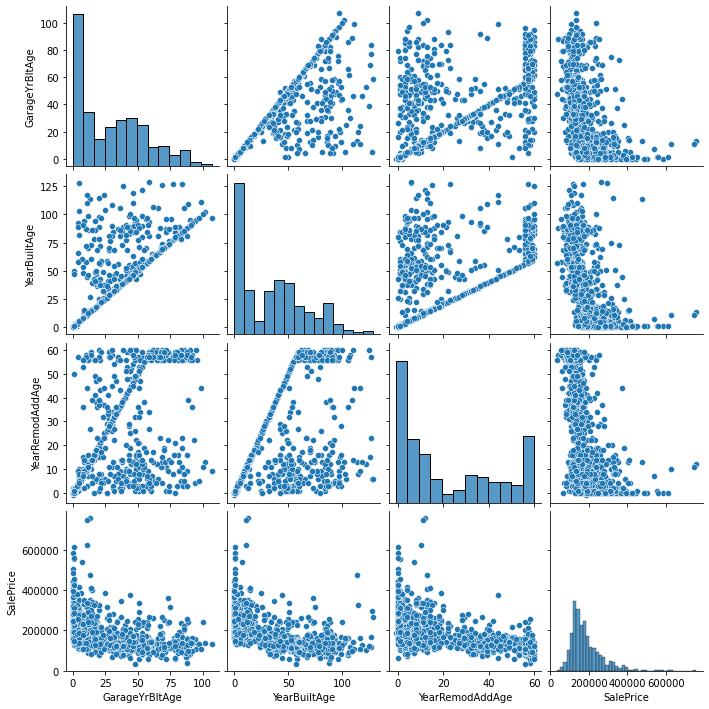

In [182]:
sns.pairplot(housing[["GarageYrBltAge","YearBuiltAge","YearRemodAddAge","SalePrice"]])

##Numeric Columns and values

In [183]:
housing_numeric = housing[["LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]]
housing_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000


##Numeric columns in a pair plot

In [184]:
##sns.pairplot(housing[["LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]])

##Scatter plots for Numeric columns

<function matplotlib.pyplot.show(*args, **kw)>

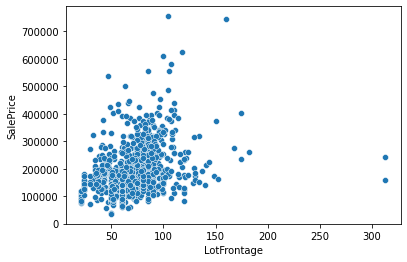

In [185]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="LotFrontage", y="SalePrice")
plt.show

###Observation:
LotFrontage has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

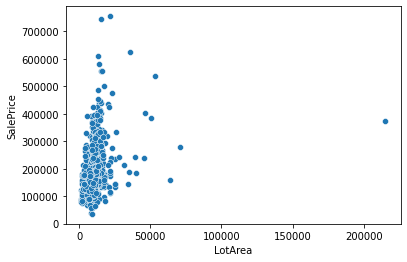

In [186]:
sns.scatterplot(data=housing, x="LotArea", y="SalePrice")
plt.show


###Observation:
LotArea has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

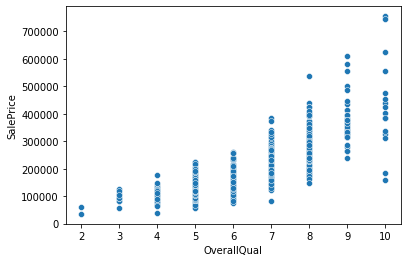

In [187]:
sns.scatterplot(data=housing, x="OverallQual", y="SalePrice")
plt.show


###Observation:
OverallQual has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

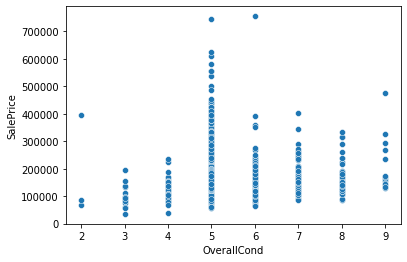

In [188]:
sns.scatterplot(data=housing, x="OverallCond", y="SalePrice")
plt.show


###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

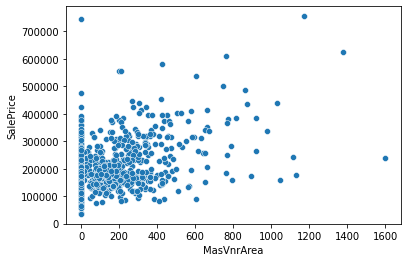

In [189]:
sns.scatterplot(data=housing, x="MasVnrArea", y="SalePrice")
plt.show


###Observation:
MasVnrArea has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

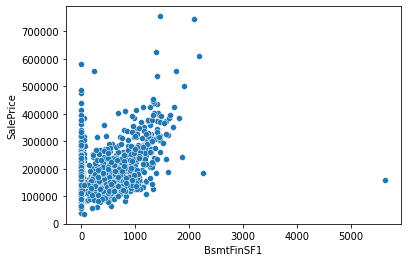

In [190]:
sns.scatterplot(data=housing, x="BsmtFinSF1", y="SalePrice")
plt.show

###Observation:
BsmtFinSF1 has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

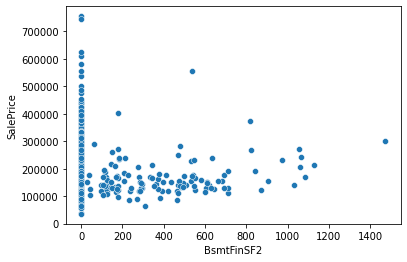

In [191]:
sns.scatterplot(data=housing, x="BsmtFinSF2", y="SalePrice")
plt.show


###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

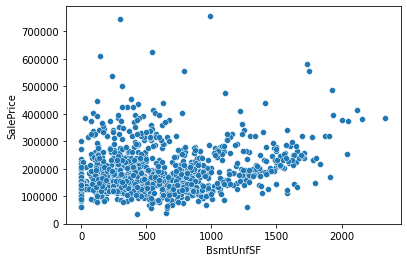

In [192]:
sns.scatterplot(data=housing, x="BsmtUnfSF", y="SalePrice")
plt.show


###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

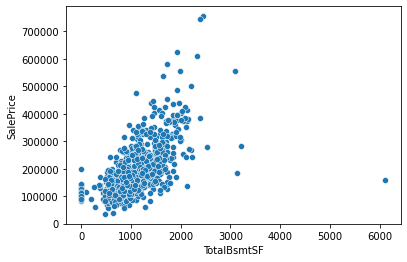

In [193]:
sns.scatterplot(data=housing, x="TotalBsmtSF", y="SalePrice")
plt.show


###Observation:
TotalBsmtSF has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

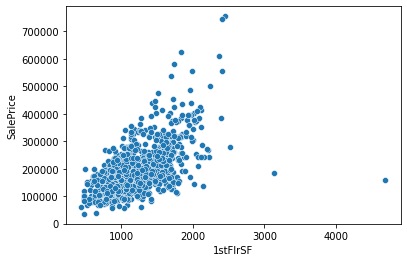

In [194]:
sns.scatterplot(data=housing, x="1stFlrSF", y="SalePrice")
plt.show


###Observation:
1stFlrSF has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

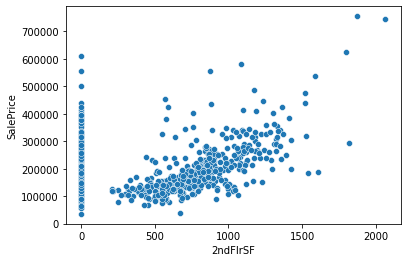

In [195]:
sns.scatterplot(data=housing, x="2ndFlrSF", y="SalePrice")
plt.show

###Observation:
2ndFlrSF has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

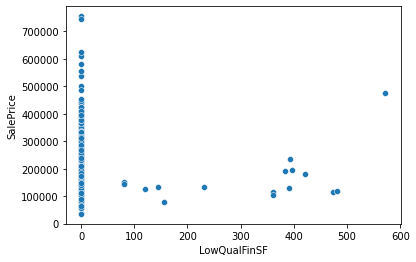

In [196]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="LowQualFinSF", y="SalePrice")
plt.show

###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

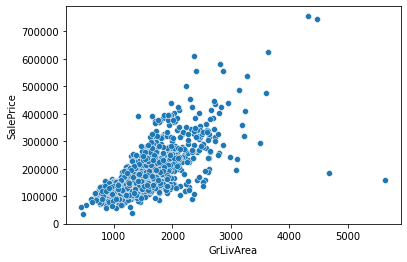

In [197]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="GrLivArea", y="SalePrice")
plt.show

###Observation:
GrLivArea has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

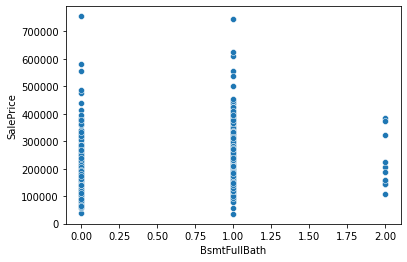

In [198]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="BsmtFullBath", y="SalePrice")
plt.show

###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

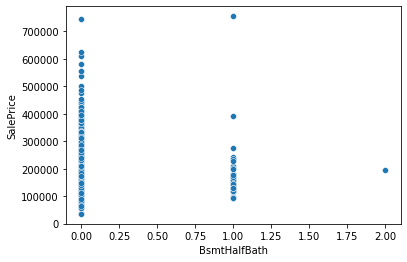

In [199]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="BsmtHalfBath", y="SalePrice")
plt.show

###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

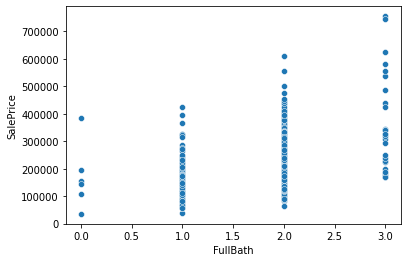

In [200]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="FullBath", y="SalePrice")
plt.show

###Observation:
FullBath has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

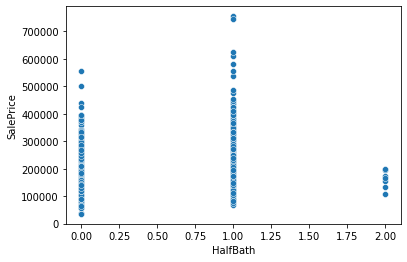

In [201]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="HalfBath", y="SalePrice")
plt.show

###Observation:
no strong linear trend observed

<function matplotlib.pyplot.show(*args, **kw)>

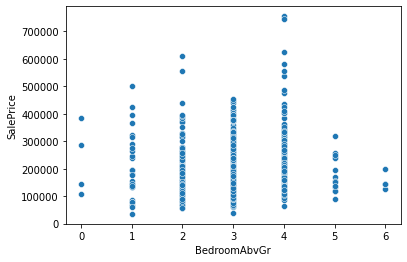

In [202]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="BedroomAbvGr", y="SalePrice")
plt.show

###Observation:

No linear trend observed

<function matplotlib.pyplot.show(*args, **kw)>

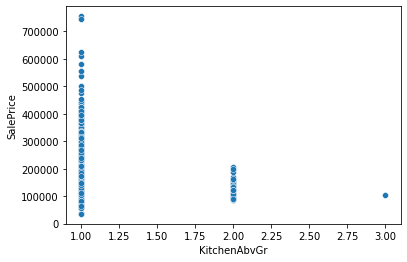

In [203]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="KitchenAbvGr", y="SalePrice")
plt.show

###Observation:
No linear trend observed

<function matplotlib.pyplot.show(*args, **kw)>

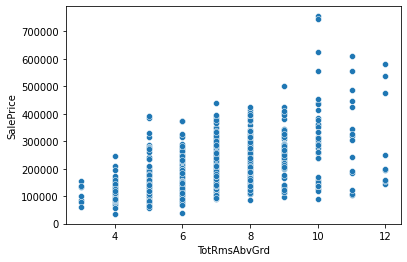

In [204]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="TotRmsAbvGrd", y="SalePrice")
plt.show

###Observation:
TotRmsAbvGrd has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

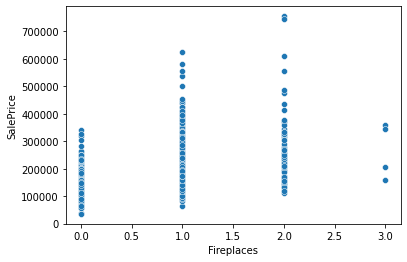

In [205]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="Fireplaces", y="SalePrice")
plt.show

###Observation:
Fireplaces has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

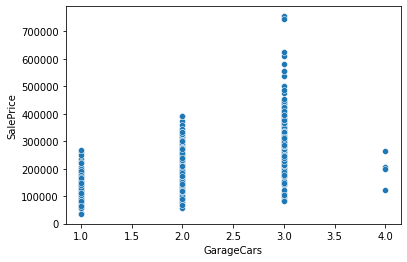

In [206]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="GarageCars", y="SalePrice")
plt.show

###Observation:
GarageCars has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

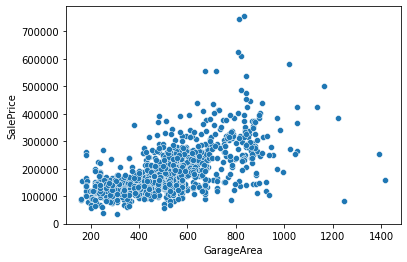

In [207]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="GarageArea", y="SalePrice")
plt.show

###Observation:
GarageArea has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

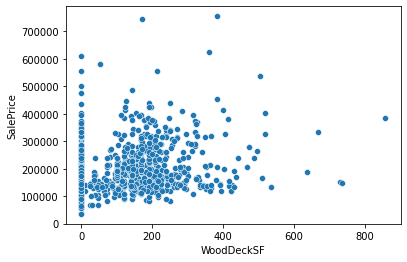

In [208]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="WoodDeckSF", y="SalePrice")
plt.show

###Observation:
WoodDeckSF has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

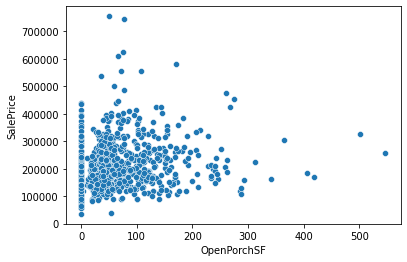

In [209]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="OpenPorchSF", y="SalePrice")
plt.show

###Observation:
OpenPorchSF has a linear relationship with SalePrice

<function matplotlib.pyplot.show(*args, **kw)>

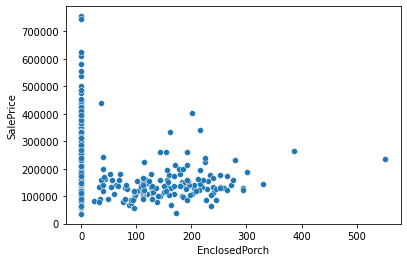

In [210]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="EnclosedPorch", y="SalePrice")
plt.show

###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

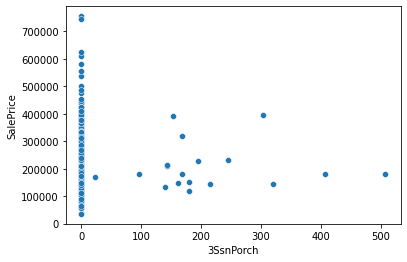

In [211]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="3SsnPorch", y="SalePrice")
plt.show

###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

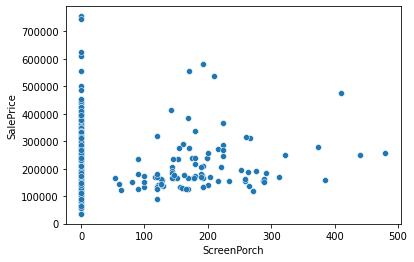

In [212]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="ScreenPorch", y="SalePrice")
plt.show

###Observation:
No strong trend observed

<function matplotlib.pyplot.show(*args, **kw)>

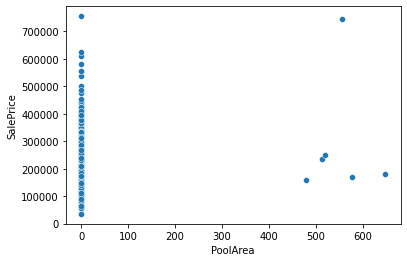

In [213]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="PoolArea", y="SalePrice")
plt.show

###Observation:
No strong linear trend observed

<function matplotlib.pyplot.show(*args, **kw)>

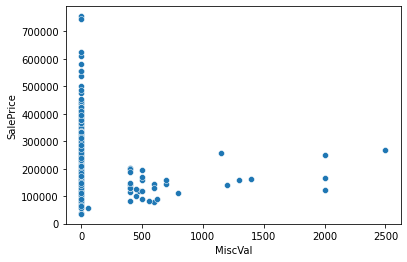

In [214]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="MiscVal", y="SalePrice")
plt.show

###Observation:
No strong linear trend observed

<function matplotlib.pyplot.show(*args, **kw)>

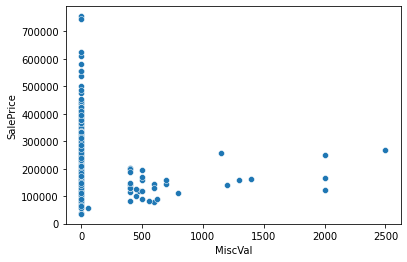

In [215]:
##"LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
##"2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
##"Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]
sns.scatterplot(data=housing, x="MiscVal", y="SalePrice")
plt.show

###Observation:
No strong linear trend observed

##Univariate Analysis

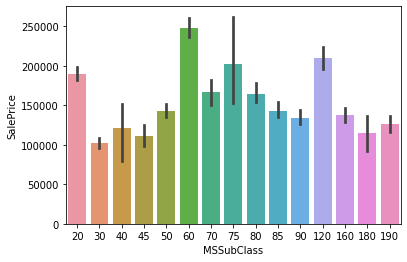

In [216]:
sns.barplot(data = housing, x = "MSSubClass", y=  "SalePrice")
#housing["MSSubClass","SalePrice"].plot(kind="bar")

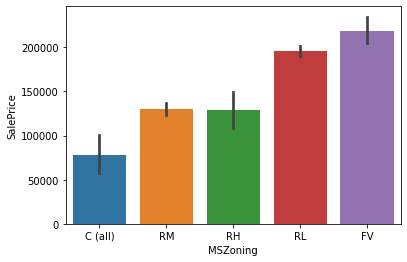

In [217]:
sns.barplot(data = housing, x = "MSZoning", y=  "SalePrice",order=["C (all)", "RM", "RH", "RL", "FV"])

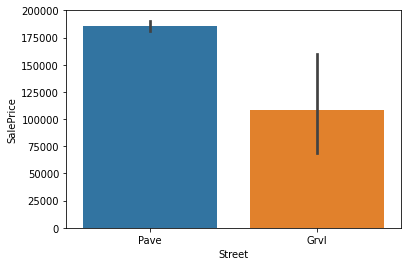

In [218]:
sns.barplot(data = housing, x = "Street", y=  "SalePrice")

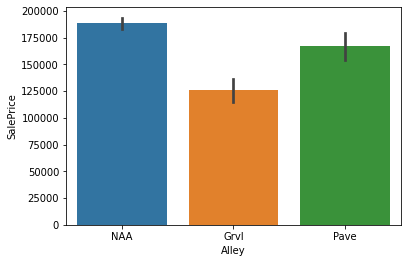

In [219]:
sns.barplot(data = housing, x = "Alley", y=  "SalePrice")

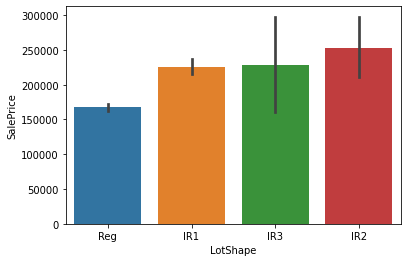

In [220]:
sns.barplot(data = housing, x = "LotShape", y=  "SalePrice",order=["Reg", "IR1", "IR3", "IR2"])

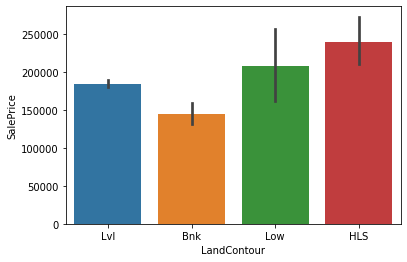

In [221]:
sns.barplot(data = housing, x = "LandContour", y=  "SalePrice")

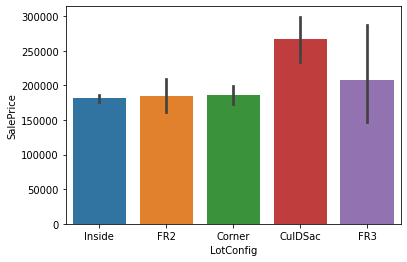

In [222]:
sns.barplot(data = housing, x = "LotConfig", y=  "SalePrice")

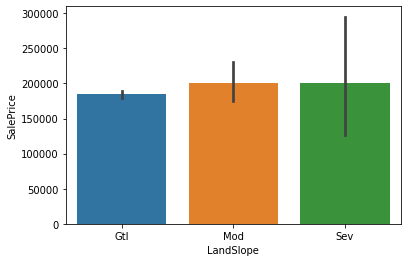

In [223]:
sns.barplot(data = housing, x = "LandSlope", y=  "SalePrice")

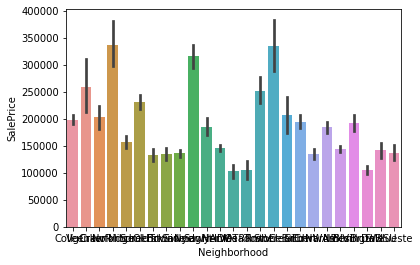

In [224]:
sns.barplot(data = housing, x = "Neighborhood", y=  "SalePrice")

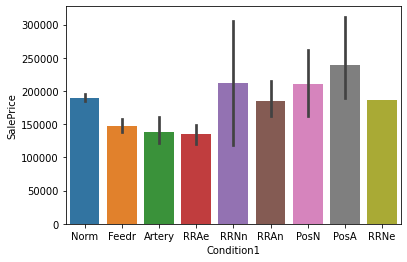

In [225]:
sns.barplot(data = housing, x = "Condition1", y=  "SalePrice")

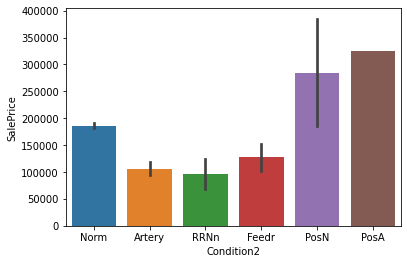

In [226]:
sns.barplot(data = housing, x = "Condition2", y=  "SalePrice")

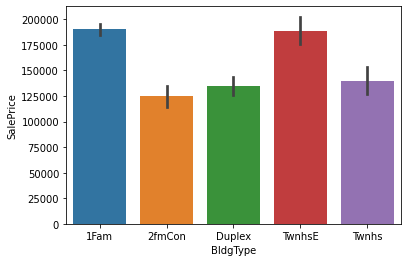

In [227]:
sns.barplot(data = housing, x = "BldgType", y=  "SalePrice")

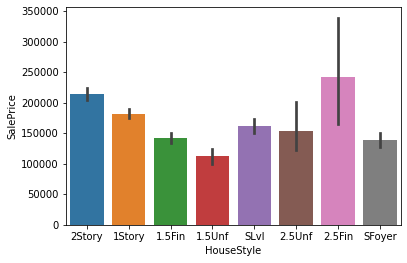

In [228]:
sns.barplot(data = housing, x = "HouseStyle", y=  "SalePrice")

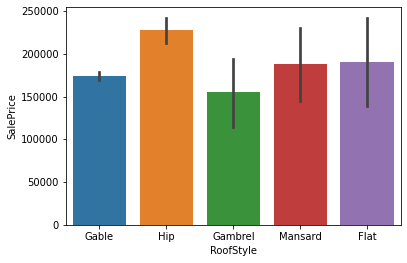

In [229]:
sns.barplot(data = housing, x = "RoofStyle", y=  "SalePrice")

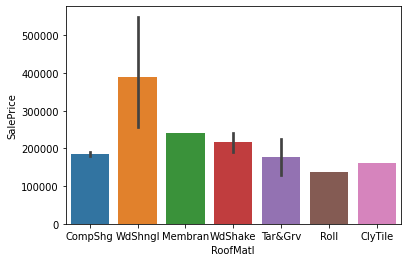

In [230]:
sns.barplot(data = housing, x = "RoofMatl", y=  "SalePrice")

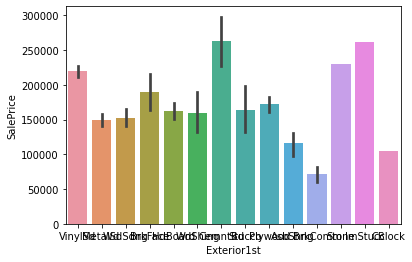

In [231]:
sns.barplot(data = housing, x = "Exterior1st", y=  "SalePrice")

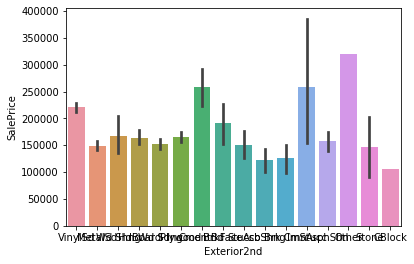

In [232]:
sns.barplot(data = housing, x = "Exterior2nd", y=  "SalePrice")

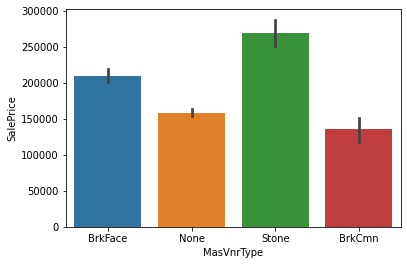

In [233]:
sns.barplot(data = housing, x = "MasVnrType", y=  "SalePrice")

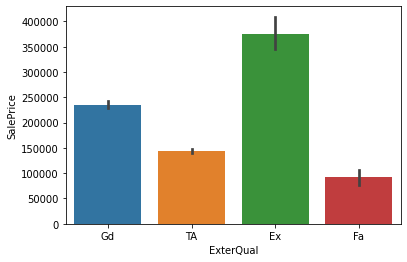

In [234]:
sns.barplot(data = housing, x = "ExterQual", y=  "SalePrice")

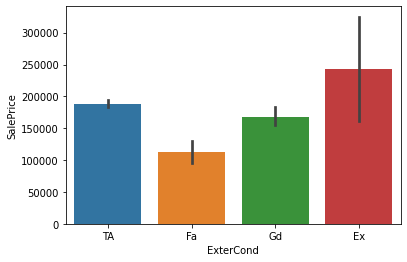

In [235]:
sns.barplot(data = housing, x = "ExterCond", y=  "SalePrice")

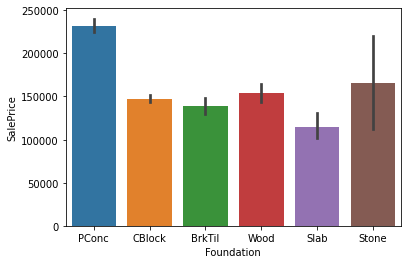

In [236]:
sns.barplot(data = housing, x = "Foundation", y=  "SalePrice")

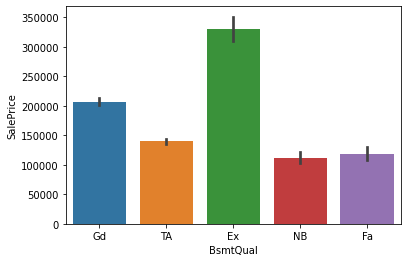

In [237]:
sns.barplot(data = housing, x = "BsmtQual", y=  "SalePrice")

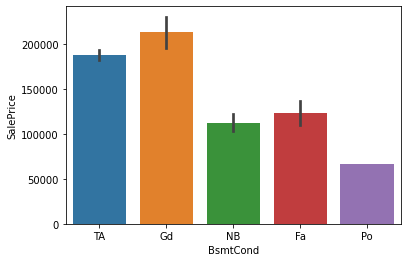

In [238]:
sns.barplot(data = housing, x = "BsmtCond", y=  "SalePrice")

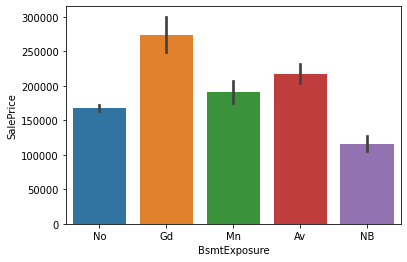

In [239]:
sns.barplot(data = housing, x = "BsmtExposure", y=  "SalePrice")

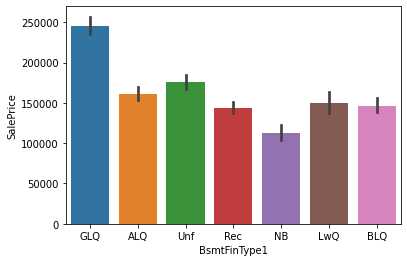

In [240]:
sns.barplot(data = housing, x = "BsmtFinType1", y=  "SalePrice")

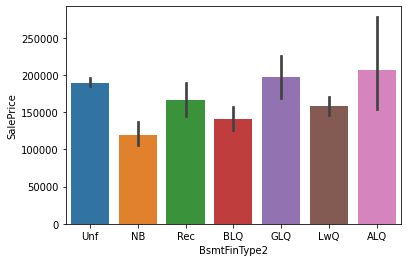

In [241]:
sns.barplot(data = housing, x = "BsmtFinType2", y=  "SalePrice")

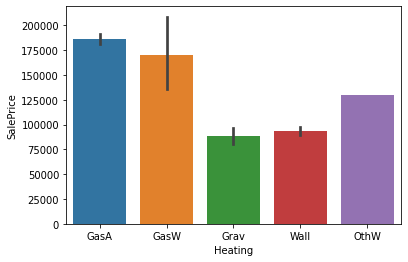

In [242]:
sns.barplot(data = housing, x = "Heating", y=  "SalePrice")

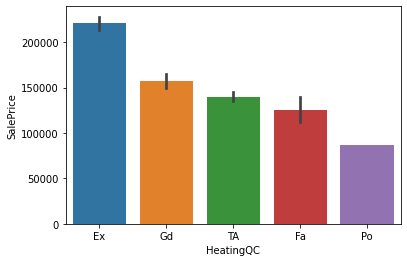

In [243]:
sns.barplot(data = housing, x = "HeatingQC", y=  "SalePrice")

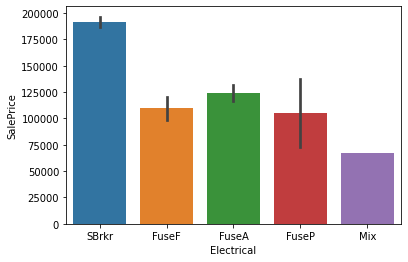

In [244]:
sns.barplot(data = housing, x = "Electrical", y=  "SalePrice")

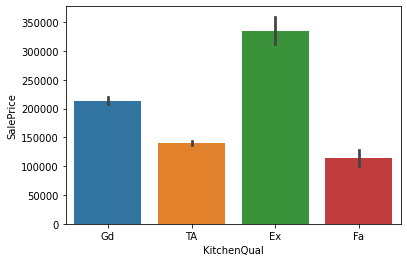

In [245]:
sns.barplot(data = housing, x = "KitchenQual", y=  "SalePrice")

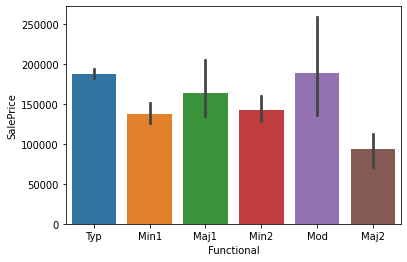

In [246]:
sns.barplot(data = housing, x = "Functional", y=  "SalePrice")

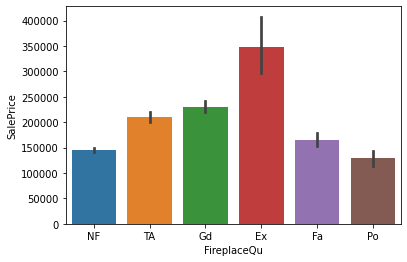

In [247]:
sns.barplot(data = housing, x = "FireplaceQu", y=  "SalePrice")

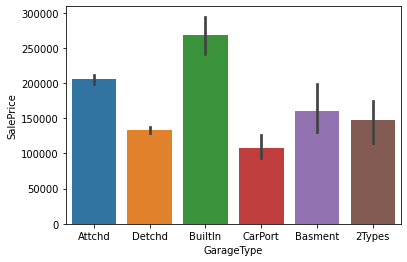

In [248]:
sns.barplot(data = housing, x = "GarageType", y=  "SalePrice")

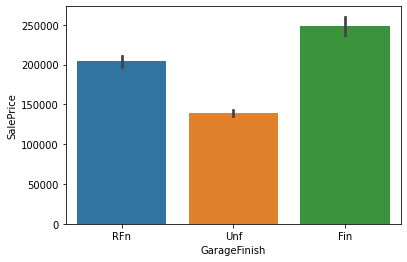

In [249]:
sns.barplot(data = housing, x = "GarageFinish", y=  "SalePrice")

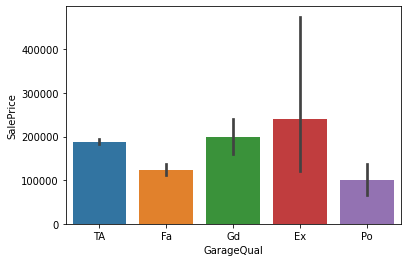

In [250]:
sns.barplot(data = housing, x = "GarageQual", y=  "SalePrice")

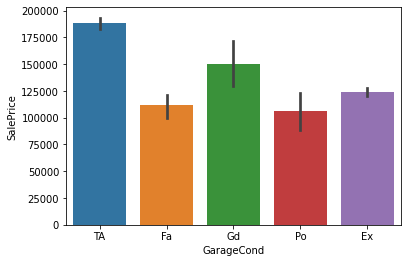

In [251]:
sns.barplot(data = housing, x = "GarageCond", y=  "SalePrice")

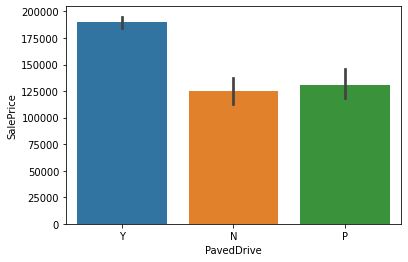

In [252]:
sns.barplot(data = housing, x = "PavedDrive", y=  "SalePrice")

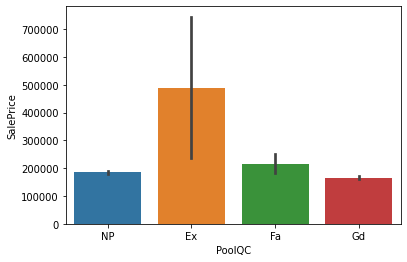

In [253]:
sns.barplot(data = housing, x = "PoolQC", y=  "SalePrice")

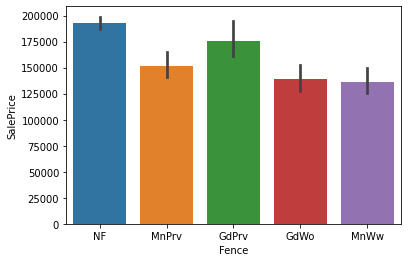

In [254]:
sns.barplot(data = housing, x = "Fence", y=  "SalePrice")

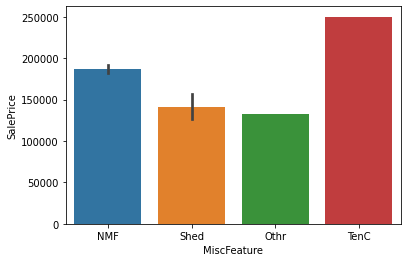

In [255]:
sns.barplot(data = housing, x = "MiscFeature", y=  "SalePrice")

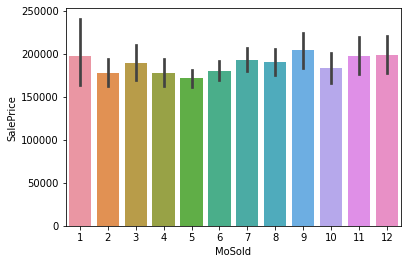

In [256]:
sns.barplot(data = housing, x = "MoSold", y=  "SalePrice")

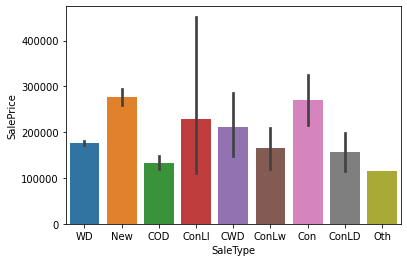

In [257]:
sns.barplot(data = housing, x = "SaleType", y=  "SalePrice")

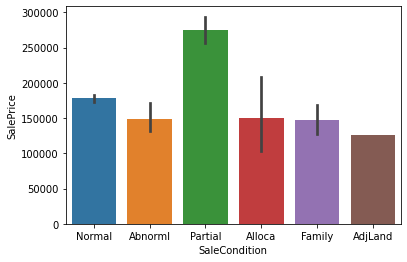

In [258]:
sns.barplot(data = housing, x = "SaleCondition", y=  "SalePrice")

##Corelation matrix for numeric variables

In [259]:
# correlation matrix
housing_corr = housing_numeric.corr()
housing_corr

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.421190,0.241482,-0.046272,0.190046,0.241528,0.049332,0.115358,0.388175,0.451418,...,0.286576,0.356945,0.082161,0.161915,0.014293,0.069726,0.035931,0.211754,0.001483,0.344297
LotArea,0.421190,1.000000,0.167545,-0.034375,0.106107,0.230492,0.138227,0.011269,0.302815,0.329807,...,0.172439,0.211367,0.133579,0.099162,-0.023647,0.012516,0.072508,0.109144,0.012784,0.299960
OverallQual,0.241482,0.167545,1.000000,-0.163646,0.423746,0.248949,-0.068754,0.322440,0.563543,0.514049,...,0.594162,0.550497,0.282658,0.340312,-0.144682,0.017249,0.055098,0.080102,-0.062197,0.798002
OverallCond,-0.046272,-0.034375,-0.163646,1.000000,-0.167076,-0.055256,0.042188,-0.148882,-0.193725,-0.164868,...,-0.267809,-0.226657,-0.010808,-0.076637,0.062592,-0.006915,0.086913,-0.023603,0.119722,-0.124511
MasVnrArea,0.190046,0.106107,0.423746,-0.167076,1.000000,0.285006,-0.075419,0.109855,0.384110,0.362898,...,0.375424,0.381992,0.174705,0.129214,-0.117039,0.022277,0.052513,0.021614,-0.054125,0.488629
BsmtFinSF1,0.241528,0.230492,0.248949,-0.055256,0.285006,1.000000,-0.036032,-0.502861,0.530397,0.467541,...,0.196678,0.286356,0.206378,0.127380,-0.105756,0.021746,0.059428,0.194365,0.002910,0.390280
BsmtFinSF2,0.049332,0.138227,-0.068754,0.042188,-0.075419,-0.036032,1.000000,-0.220338,0.093791,0.072856,...,-0.075434,-0.048103,0.032354,0.010340,0.047135,-0.030878,0.067833,0.061196,0.014255,-0.028078
BsmtUnfSF,0.115358,0.011269,0.322440,-0.148882,0.109855,-0.502861,-0.220338,1.000000,0.404338,0.314716,...,0.277172,0.235157,0.005417,0.151323,-0.035945,0.021457,-0.006515,-0.053930,-0.038978,0.213063
TotalBsmtSF,0.388175,0.302815,0.563543,-0.193725,0.384110,0.530397,0.093791,0.404338,1.000000,0.835834,...,0.460420,0.521935,0.234001,0.290671,-0.130868,0.033624,0.079961,0.171573,-0.031306,0.615990
1stFlrSF,0.451418,0.329807,0.514049,-0.164868,0.362898,0.467541,0.072856,0.314716,0.835834,1.000000,...,0.469192,0.521003,0.237813,0.244335,-0.114008,0.037415,0.087358,0.151771,-0.031063,0.608092


#Data Preparation

##Dummy Variable Creation

In [260]:
housing["MSSubClass"] = 'MSSubClass' + housing["MSSubClass"].astype('string')
housing["MSSubClass"].value_counts()
MSSubClass = pd.get_dummies(housing["MSSubClass"],drop_first = True)
housing = pd.concat([housing,MSSubClass],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSSubClass30,MSSubClass40,MSSubClass45,MSSubClass50,MSSubClass60,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,MSSubClass90
0,MSSubClass60,RL,65.0,8450,Pave,NAA,Reg,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,0,0,0
1,MSSubClass20,RL,80.0,9600,Pave,NAA,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0
2,MSSubClass60,RL,68.0,11250,Pave,NAA,IR1,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,0,0,0
3,MSSubClass70,RL,60.0,9550,Pave,NAA,IR1,Lvl,Corner,Gtl,...,0,0,0,0,0,1,0,0,0,0
4,MSSubClass60,RL,84.0,14260,Pave,NAA,IR1,Lvl,FR2,Gtl,...,0,0,0,0,1,0,0,0,0,0


In [261]:
housing["MSZoning"] = 'MSZoning_' + housing["MSZoning"].astype('string')
housing["MSZoning"].value_counts()
MSZoning = pd.get_dummies(housing["MSZoning"],drop_first = True)
housing = pd.concat([housing,MSZoning],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSSubClass60,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,MSSubClass90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,MSSubClass60,MSZoning_RL,65.0,8450,Pave,NAA,Reg,Lvl,Inside,Gtl,...,1,0,0,0,0,0,0,0,1,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Pave,NAA,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,0,0,0,1,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Pave,NAA,IR1,Lvl,Inside,Gtl,...,1,0,0,0,0,0,0,0,1,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Pave,NAA,IR1,Lvl,Corner,Gtl,...,0,1,0,0,0,0,0,0,1,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Pave,NAA,IR1,Lvl,FR2,Gtl,...,1,0,0,0,0,0,0,0,1,0


In [262]:
housing["Street"] = 'Street_' + housing["Street"].astype('string')
housing["Street"].value_counts()
Street = pd.get_dummies(housing["Street"],drop_first = True)
housing = pd.concat([housing,Street],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,MSSubClass90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,NAA,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,0,0,1,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,NAA,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,0,0,1,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,NAA,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,0,0,1,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,NAA,IR1,Lvl,Corner,Gtl,...,1,0,0,0,0,0,0,1,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,NAA,IR1,Lvl,FR2,Gtl,...,0,0,0,0,0,0,0,1,0,1


In [263]:
housing["Alley"] = 'Alley_' + housing["Alley"].astype('string')
housing["Alley"].value_counts()
Alley = pd.get_dummies(housing["Alley"],drop_first = True)
housing = pd.concat([housing,Alley],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSSubClass80,MSSubClass85,MSSubClass90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NAA,Alley_Pave
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,1,0,1,1,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,1,0,1,1,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,1,0,1,1,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,IR1,Lvl,Corner,Gtl,...,0,0,0,0,0,1,0,1,1,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,IR1,Lvl,FR2,Gtl,...,0,0,0,0,0,1,0,1,1,0


In [264]:
housing["LotShape"] = 'LotShape_' + housing["LotShape"].astype('string')
housing["LotShape"].value_counts()
LotShape = pd.get_dummies(housing["LotShape"],drop_first = True)
housing = pd.concat([housing,LotShape],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NAA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,Lvl,Inside,Gtl,...,0,0,1,0,1,1,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,Lvl,FR2,Gtl,...,0,0,1,0,1,1,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,Lvl,Inside,Gtl,...,0,0,1,0,1,1,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,Lvl,Corner,Gtl,...,0,0,1,0,1,1,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,Lvl,FR2,Gtl,...,0,0,1,0,1,1,0,0,0,0


In [265]:
housing["LandContour"] = 'LandContour_' + housing["LandContour"].astype('string')
housing["LandContour"].value_counts()
LandContour = pd.get_dummies(housing["LandContour"],drop_first = True)
housing = pd.concat([housing,LandContour],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_RM,Street_Pave,Alley_NAA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,Inside,Gtl,...,0,1,1,0,0,0,1,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,FR2,Gtl,...,0,1,1,0,0,0,1,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,Inside,Gtl,...,0,1,1,0,0,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,Corner,Gtl,...,0,1,1,0,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,FR2,Gtl,...,0,1,1,0,0,0,0,0,0,1


In [266]:
housing["LotConfig"] = 'LotConfig_' + housing["LotConfig"].astype('string')
housing["LotConfig"].value_counts()
LotConfig = pd.get_dummies(housing["LotConfig"],drop_first = True)
housing = pd.concat([housing,LotConfig],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,Gtl,...,0,0,1,0,0,1,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,Gtl,...,0,0,1,0,0,1,0,1,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,Gtl,...,0,0,0,0,0,1,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,Gtl,...,0,0,0,0,0,1,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,Gtl,...,0,0,0,0,0,1,0,1,0,0


In [267]:
housing["LandSlope"] = 'LandSlope_' + housing["LandSlope"].astype('string')
housing["LandSlope"].value_counts()
LandSlope = pd.get_dummies(housing["LandSlope"],drop_first = True)
housing = pd.concat([housing,LandSlope],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,1,0,0,0,1,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,1,0,1,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,0,1,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,1,0,1,0,0,0,0


In [268]:
housing["Neighborhood"] = 'Neighborhood_' + housing["Neighborhood"].astype('string')
housing["Neighborhood"].value_counts()
Neighborhood = pd.get_dummies(housing["Neighborhood"],drop_first = True)
housing = pd.concat([housing,Neighborhood],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,0,0,0,0,0,0


In [269]:
housing["Condition1"] = 'Condition1_' + housing["Condition1"].astype('string')
housing["Condition1"].value_counts()
Condition1 = pd.get_dummies(housing["Condition1"],drop_first = True)
housing = pd.concat([housing,Condition1],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,1,0,0,0,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,0


In [270]:
housing["Condition2"] = 'Condition2_' + housing["Condition2"].astype('string')
housing["Condition2"].value_counts()
Condition2 = pd.get_dummies(housing["Condition2"],drop_first = True)
housing = pd.concat([housing,Condition2],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,0,0


In [271]:
housing["BldgType"] = 'BldgType_' + housing["BldgType"].astype('string')
housing["BldgType"].value_counts()
BldgType = pd.get_dummies(housing["BldgType"],drop_first = True)
housing = pd.concat([housing,BldgType],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,1,0,0,0,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,1,0,0,0,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,1,0,0,0,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,1,0,0,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,1,0,0,0,0,0,0,0


In [272]:
housing["HouseStyle"] = 'HouseStyle_' + housing["HouseStyle"].astype('string')
housing["HouseStyle"].value_counts()
HouseStyle = pd.get_dummies(housing["HouseStyle"],drop_first = True)
housing = pd.concat([housing,HouseStyle],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0


In [273]:
housing["RoofStyle"] = 'RoofStyle_' + housing["RoofStyle"].astype('string')
housing["RoofStyle"].value_counts()
RoofStyle = pd.get_dummies(housing["RoofStyle"],drop_first = True)
housing = pd.concat([housing,RoofStyle],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,1,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,0,0,1,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,1,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,1,0,0,1,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,1,0,0,1,0,0,0


In [274]:
housing["RoofMatl"] = 'RoofMatl_' + housing["RoofMatl"].astype('string')
housing["RoofMatl"].value_counts()
RoofMatl = pd.get_dummies(housing["RoofMatl"],drop_first = True)
housing = pd.concat([housing,RoofMatl],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,0,1,0,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,1,0,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,0,1,0,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,1,0,0,0,1,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,1,0,0,0,0,0


In [275]:
housing["Exterior1st"] = 'Exterior1st_' + housing["Exterior1st"].astype('string')
housing["Exterior1st"].value_counts()
Exterior1st = pd.get_dummies(housing["Exterior1st"],drop_first = True)
housing = pd.concat([housing,Exterior1st],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,1,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0


In [276]:
housing["Exterior2nd"] = 'Exterior2nd_' + housing["Exterior2nd"].astype('string')
housing["Exterior2nd"].value_counts()
Exterior2nd = pd.get_dummies(housing["Exterior2nd"],drop_first = True)
housing = pd.concat([housing,Exterior2nd],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,1,0,0,0,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,0


In [277]:
housing["MasVnrType"] = 'MasVnrType_' + housing["MasVnrType"].astype('string')
housing["MasVnrType"].value_counts()
MasVnrType = pd.get_dummies(housing["MasVnrType"],drop_first = True)
housing = pd.concat([housing,MasVnrType],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,0,0,1,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,1,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,0,0,1,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,1,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,0,0,1,0,0


In [278]:
housing["ExterQual"] = 'ExterQual_' + housing["ExterQual"].astype('string')
housing["ExterQual"].value_counts()
ExterQual = pd.get_dummies(housing["ExterQual"],drop_first = True)
housing = pd.concat([housing,ExterQual],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,0,1,0,0,0,1,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,0,1,0,0,0,1,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,1,0,1,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,0,0,1,0,0,0,1,0


In [279]:
housing["ExterCond"] = 'ExterCond_' + housing["ExterCond"].astype('string')
housing["ExterCond"].value_counts()
ExterCond = pd.get_dummies(housing["ExterCond"],drop_first = True)
housing = pd.concat([housing,ExterCond],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,0,0,1,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,1,0,0,0,1,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,0,0,1,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,1,0,1,0,0,0,1,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,0,0,0,1,0,0,0,1


In [280]:
housing["Foundation"] = 'Foundation_' + housing["Foundation"].astype('string')
housing["Foundation"].value_counts()
Foundation = pd.get_dummies(housing["Foundation"],drop_first = True)
housing = pd.concat([housing,Foundation],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,0,1,0,1,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,0,0,1,1,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,0,1,0,1,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,1,0,0,1,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,1,0,1,0,0,0


In [281]:
housing["BsmtQual"] = 'BsmtQual_' + housing["BsmtQual"].astype('string')
housing["BsmtQual"].value_counts()
BsmtQual = pd.get_dummies(housing["BsmtQual"],drop_first = True)
housing = pd.concat([housing,BsmtQual],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,1,0,0,0,0,1,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,1,0,0,0,0,0,1,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,1,0,0,0,0,1,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,1,0,0,0,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,1,0,0,0,0,1,0,0


In [282]:
housing["BsmtCond"] = 'BsmtCond_' + housing["BsmtCond"].astype('string')
housing["BsmtCond"].value_counts()
BsmtCond = pd.get_dummies(housing["BsmtCond"],drop_first = True)
housing = pd.concat([housing,BsmtCond],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NB,BsmtCond_Po,BsmtCond_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,1,1,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,1


In [283]:
housing["BsmtExposure"] = 'BsmtExposure_' + housing["BsmtExposure"].astype('string')
housing["BsmtExposure"].value_counts()
BsmtExposure = pd.get_dummies(housing["BsmtExposure"],drop_first = True)
housing = pd.concat([housing,BsmtExposure],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,BsmtQual_NB,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NB,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,1,1,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,1,0,1,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,1,1,0,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,0


In [284]:
housing["BsmtFinType1"] = 'BsmtFinType1_' + housing["BsmtFinType1"].astype('string')
housing["BsmtFinType1"].value_counts()
BsmtFinType1 = pd.get_dummies(housing["BsmtFinType1"],drop_first = True)
housing = pd.concat([housing,BsmtFinType1],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,1,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,0,0,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,0,0,1,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,0


In [285]:
housing["BsmtFinType2"] = 'BsmtFinType2_' + housing["BsmtFinType2"].astype('string')
housing["BsmtFinType2"].value_counts()
BsmtFinType2 = pd.get_dummies(housing["BsmtFinType2"],drop_first = False)
housing = pd.concat([housing,BsmtFinType2],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NB,BsmtFinType2_Rec,BsmtFinType2_Unf
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1


In [286]:
housing["Heating"] = 'Heating_' + housing["Heating"].astype('string')
housing["Heating"].value_counts()
Heating = pd.get_dummies(housing["Heating"],drop_first = True)
housing = pd.concat([housing,Heating],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NB,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,0


In [287]:
housing["HeatingQC"] = 'HeatingQC_' + housing["HeatingQC"].astype('string')
housing["HeatingQC"].value_counts()
HeatingQC = pd.get_dummies(housing["HeatingQC"],drop_first = True)
housing = pd.concat([housing,HeatingQC],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,0,0,0,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,0,0,0,0,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,0,0,0,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,1,0,0,0,0,0,1,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,0,0,0,0,0,0,0,0


In [288]:
housing["Electrical"] = 'Electrical_' + housing["Electrical"].astype('string')
housing["Electrical"].value_counts()
Electrical = pd.get_dummies(housing["Electrical"],drop_first = True)
housing = pd.concat([housing,Electrical],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,1,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1


In [289]:
housing["KitchenQual"] = 'KitchenQual_' + housing["KitchenQual"].astype('string')
housing["KitchenQual"].value_counts()
KitchenQual = pd.get_dummies(housing["KitchenQual"],drop_first = True)
housing = pd.concat([housing,KitchenQual],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,1,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,1,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,1,0,0,0,0,0,1,0,1,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,1,0,1,0


In [290]:
housing["Functional"] = 'Functional_' + housing["Functional"].astype('string')
housing["Functional"].value_counts()
Functional = pd.get_dummies(housing["Functional"],drop_first = True)
housing = pd.concat([housing,Functional],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,1,0,0,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,0,0,1,0,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,1,0,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,1,0,1,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,0,1,0,0,0,0,0,1


In [291]:
housing["FireplaceQu"] = 'FireplaceQu_' + housing["FireplaceQu"].astype('string')
housing["FireplaceQu"].value_counts()
FireplaceQu = pd.get_dummies(housing["FireplaceQu"],drop_first = True)
housing = pd.concat([housing,FireplaceQu],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_Po,FireplaceQu_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,0,0,1,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,1,0,1,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,1


In [292]:
housing["GarageType"] = 'GarageType_NG' + housing["GarageType"].astype('string')
housing["GarageType"].value_counts()
GarageType = pd.get_dummies(housing["GarageType"],drop_first = True)
housing = pd.concat([housing,GarageType],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_Po,FireplaceQu_TA,GarageType_NGAttchd,GarageType_NGBasment,GarageType_NGBuiltIn,GarageType_NGCarPort,GarageType_NGDetchd
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,1,0,0,1,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,1,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,1,0,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,1,0,0,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,1,0,0,0,0


In [293]:
housing["GarageFinish"] = 'GarageFinish_' + housing["GarageFinish"].astype('string')
housing["GarageFinish"].value_counts()
GarageFinish = pd.get_dummies(housing["GarageFinish"],drop_first = True)
housing = pd.concat([housing,GarageFinish],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,FireplaceQu_NF,FireplaceQu_Po,FireplaceQu_TA,GarageType_NGAttchd,GarageType_NGBasment,GarageType_NGBuiltIn,GarageType_NGCarPort,GarageType_NGDetchd,GarageFinish_RFn,GarageFinish_Unf
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,1,0,0,0,0,1,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,1,1,0,0,0,0,1,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,1,1,0,0,0,0,1,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,0,1,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,1,1,0,0,0,0,1,0


In [294]:
housing["GarageQual"] = 'GarageQual_' + housing["GarageQual"].astype('string')
housing["GarageQual"].value_counts()
GarageQual = pd.get_dummies(housing["GarageQual"],drop_first = True)
housing = pd.concat([housing,GarageQual],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,GarageType_NGBasment,GarageType_NGBuiltIn,GarageType_NGCarPort,GarageType_NGDetchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,1,0,1,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,1


In [295]:
housing["GarageCond"] = 'GarageCond_' + housing["GarageCond"].astype('string')
housing["GarageCond"].value_counts()
GarageCond = pd.get_dummies(housing["GarageCond"],drop_first = True)
housing = pd.concat([housing,GarageCond],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,0,0,1,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,0,1,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,0,0,1,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,1,0,0,0,1,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,0,1,0,0,0,1


In [296]:
housing["PavedDrive"] = 'PavedDrive_' + housing["PavedDrive"].astype('string')
housing["PavedDrive"].value_counts()
PavedDrive = pd.get_dummies(housing["PavedDrive"],drop_first = True)
housing = pd.concat([housing,PavedDrive],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,0,1,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,1,0,0,0,1,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,1,0,0,0,1,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,1,0,0,0,1,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,1,0,0,0,1,0,1


In [297]:
housing["PoolQC"] = 'PoolQC_' + housing["PoolQC"].astype('string')
housing["PoolQC"].value_counts()
PoolQC = pd.get_dummies(housing["PoolQC"],drop_first = True)
housing = pd.concat([housing,PoolQC],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NP
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,0,1,0,1,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,1,0,1,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,0,0,1,0,1,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,1,0,0,0,1,0,1,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,0,0,1,0,1,0,0,1


In [298]:
housing["Fence"] = 'Fence_' + housing["Fence"].astype('string')
housing["Fence"].value_counts()
Fence = pd.get_dummies(housing["Fence"],drop_first = True)
housing = pd.concat([housing,Fence],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NP,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,1,0,0,1,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,1,0,0,1,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,1,0,1,0,0,1,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,1,0,1,0,0,1,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,1,0,1,0,0,1,0,0,0,1


In [299]:
housing["MiscFeature"] = 'MiscFeature_' + housing["MiscFeature"].astype('string')
housing["MiscFeature"].value_counts()
MiscFeature = pd.get_dummies(housing["MiscFeature"],drop_first = True)
housing = pd.concat([housing,MiscFeature],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC_Fa,PoolQC_Gd,PoolQC_NP,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,1,0,0,0,1,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,1,0,0,0,1,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,1,0,0,0,1,0,0,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,1,0,0,0,1,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,1,0,0,0,1,0,0,0


In [300]:
housing["MoSold"] = 'MoSold_' + housing["MoSold"].astype('string')
housing["MoSold"].value_counts()
MoSold = pd.get_dummies(housing["MoSold"],drop_first = True)
housing = pd.concat([housing,MoSold],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,1,0,0,0,0,0,0,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,1,0,0,0,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,1,0,0,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,1,0,0,0,0,0,0,0,0


In [301]:
housing["SaleType"] = 'SaleType_' + housing["SaleType"].astype('string')
housing["SaleType"].value_counts()
SaleType = pd.get_dummies(housing["SaleType"],drop_first = True)
housing = pd.concat([housing,SaleType],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,1,0,0,0,0,0,0,0,1
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,0,0,0,0,0,1


In [302]:
housing["SaleCondition"] = 'SaleCondition_' + housing["SaleCondition"].astype('string')
housing["SaleCondition"].value_counts()
SaleCondition = pd.get_dummies(housing["SaleCondition"],drop_first = True)
housing = pd.concat([housing,SaleCondition],axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,MSSubClass60,MSZoning_RL,65.0,8450,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,1,0
1,MSSubClass20,MSZoning_RL,80.0,9600,Street_Pave,Alley_NAA,LotShape_Reg,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,1,0
2,MSSubClass60,MSZoning_RL,68.0,11250,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,1,0
3,MSSubClass70,MSZoning_RL,60.0,9550,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_Corner,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,0,0
4,MSSubClass60,MSZoning_RL,84.0,14260,Street_Pave,Alley_NAA,LotShape_IR1,LandContour_Lvl,LotConfig_FR2,LandSlope_Gtl,...,0,0,0,0,1,0,0,0,1,0


##Drop Variables for which we created the dummy variables

In [303]:
housing = housing.drop(columns = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','SaleType','SaleCondition'])
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1459
Columns: 269 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(33), uint8(234)
memory usage: 603.2 KB


#Split Data into X and Y

In [304]:
# split into X and y
X = housing.iloc[:,:]
X = X.drop(columns = ['SalePrice'])

y = housing['SalePrice']

In [305]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,1,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1,...,0,0,0,0,1,0,0,0,1,0


#Rescaling of Data using MinMaxScaler

In [306]:
scaler = MinMaxScaler()
num_vars = housing.columns
housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.625,0.428571,0.12250,0.125089,0.0,0.064212,0.140098,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.038795,0.500,0.857143,0.00000,0.173281,0.0,0.121575,0.206547,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.160959,0.046507,0.625,0.428571,0.10125,0.086109,0.0,0.185788,0.150573,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.133562,0.038561,0.625,0.428571,0.00000,0.038271,0.0,0.231164,0.123732,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.215753,0.060576,0.750,0.428571,0.21875,0.116052,0.0,0.209760,0.187398,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [307]:
# split into X and y
X = housing.iloc[:,:]
X = X.drop(columns = ['SalePrice'])
X_cols = X.columns

y = housing['SalePrice']

In [308]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.625,0.428571,0.12250,0.125089,0.0,0.064212,0.140098,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.038795,0.500,0.857143,0.00000,0.173281,0.0,0.121575,0.206547,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.160959,0.046507,0.625,0.428571,0.10125,0.086109,0.0,0.185788,0.150573,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.133562,0.038561,0.625,0.428571,0.00000,0.038271,0.0,0.231164,0.123732,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.215753,0.060576,0.750,0.428571,0.21875,0.116052,0.0,0.209760,0.187398,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#Split data into Test and Train

In [309]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#Model Building and Evaluation

##Linear Regression

In [310]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [311]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-22492040836.08874
[ 9.87106541e-03  5.14445520e-01  6.56497939e-02  5.17532775e-02
  6.26528826e-02  2.02211462e+10  5.28100097e+09  8.36934754e+09
 -2.18907164e+10  1.11565020e-02  2.08576550e+10  1.01248372e+10
  2.80455539e+09 -2.55155704e+10  7.78523287e-03  8.87635919e-04
  2.92479858e-02  1.05733459e-02 -4.08152227e-02 -4.27568422e-02
  1.82399594e-02  2.57483464e-02  2.54288603e-02  9.25142491e-03
  1.22385683e-02  1.57397185e-02 -3.08592569e-03  4.31650856e-02
  1.79209826e-02  2.14965295e+09 -3.63977792e-03  1.50061518e-03
 -5.37412154e-02 -1.05104446e-02 -8.87680054e-03 -1.10728741e-02
  1.51865069e+10  1.51865069e+10  1.51865069e+10  1.51865069e+10
  1.51865069e+10  1.51865069e+10  1.51865069e+10  1.51865069e+10
  1.51865069e+10  1.51865069e+10  1.51865069e+10 -2.91587062e+09
  5.48117161e-02  4.02469039e-02  3.29761505e-02  2.02722549e-02
  1.14456356e-01  4.41312790e-03  9.54389572e-03 -1.21421814e-02
  5.87940216e-04  7.82966614e-04  3.53860855e-03 -4.84205186e-02
 -4.09

In [312]:
from sklearn.metrics import r2_score, mean_squared_error

In [313]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.948216281351793
-2.559119171607764e+19
0.4683346217648962
1.4820648484717855e+20
0.000597365588985837
4.410907287118409e+17


##Residual Analysis for the Model built through Linear Regression Approach



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


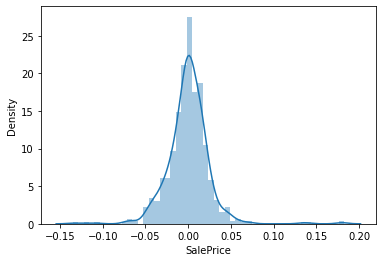

In [314]:
res = y_train - y_pred_train
sns.distplot(res)

##Y_Train vs Y_Pred Scatter plot for GrLivArea

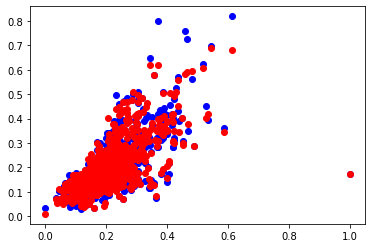

In [315]:
plt.scatter( X_train['GrLivArea'] , y_train , color = 'blue')
plt.scatter( X_train['GrLivArea'] , y_pred_train , color = 'red')
plt.show()

###Scatterplot looks good for actual vs predicted.Predicted value looks close

##Ridge

In [316]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                         return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

**Lambda Value**

In [317]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [318]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.77934056e-03  1.20364666e-02  6.84711512e-02  2.81714918e-02
  4.38905334e-02  1.13148207e-02 -1.67728391e-03  1.97270040e-02
  1.75893311e-02  7.08722430e-03  3.68372287e-02  4.05690420e-02
 -3.67052818e-03  4.58072830e-02  1.94030612e-02 -9.45709540e-03
  4.29394980e-02  2.24556122e-02  2.33164971e-03 -1.58825889e-02
  4.90096569e-02  1.49621746e-02  4.26163058e-02  2.01253472e-02
  2.75694152e-02  1.34461970e-02 -6.35389780e-03  1.81014587e-02
  1.18719240e-02 -1.14821253e-02  4.15456140e-04  5.23161175e-03
 -2.77064664e-03 -1.61636693e-02 -1.33652214e-02 -8.56959352e-03
 -6.29872095e-03  1.12141649e-02  3.25684533e-03  3.79624851e-03
  2.96106901e-03  6.94351251e-03  6.49719997e-03  1.07935354e-02
  7.46149997e-03  3.81279806e-03  2.18455670e-03 -9.16897779e-03
  1.28492260e-02  4.73637899e-03  1.03987942e-02  1.43013260e-03
  2.10788433e-02 -7.93107919e-04  8.40271426e-03  4.99085698e-03
 -2.49876233e-02 -3.62912672e-03  1.54747780e-02  8.42507844e-04
  8.58718975e-03  2.55585

In [319]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9049207376002895
0.7995856332847934
0.8599017520576537
1.1606614155867334
0.0010968134592572113
0.0034543494511509922


##Y_Train vs Y_Pred Scatter plot for GrLivArea

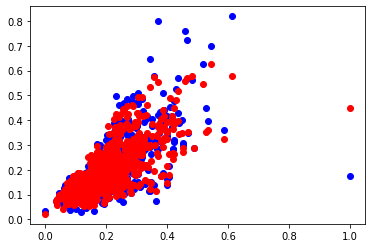

In [320]:
plt.scatter( X_train['GrLivArea'] , y_train , color = 'blue')
plt.scatter( X_train['GrLivArea'] , y_pred_train , color = 'red')
plt.show()

###Scatterplot looks good for actual vs predicted.Predicted value looks close

##Residual Analysis for the Model built through Ridge Approach



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


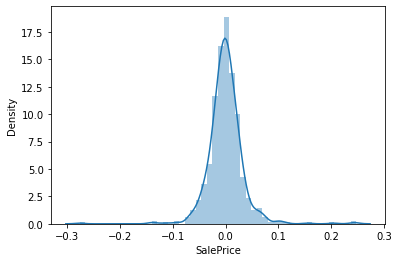

In [321]:
res = y_train - y_pred_train
sns.distplot(res)

##Lasso

In [322]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

**Lambda Value**

In [323]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [324]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [325]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  1.11596459e-01,  4.36887165e-02,
        6.77807642e-02,  0.00000000e+00,  0.00000000e+00,  9.04338446e-03,
        0.00000000e+00,  6.96851673e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.35321283e-01,  2.19509418e-02, -0.00000000e+00,
        4.55591419e-02,  1.95718493e-02, -2.42126015e-03, -5.02192955e-02,
        3.16052798e-02,  1.13655024e-02,  5.09669562e-02,  0.00000000e+00,
        2.64798430e-02,  1.51601079e-02, -3.21048099e-03,  1.85161210e-02,
        1.17933019e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -8.36404736e-03, -1.01839620e-02, -0.00000000e+00,
       -0.00000000e+00,  5.26639261e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.66680794e-03,  0.00000000e+00, -8.29491936e-03,
        1.61485486e-02,  0.00000000e+00,  7.74476572e-03, -0.00000000e+00,
        3.51544971e-02, -

In [326]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9124396767475718
0.8256040270796807
0.7919000786834758
1.0099808717304148
0.001010076630973821
0.0030058954515786154


##Y_Train vs Y_Pred Scatter plot for GrLivArea

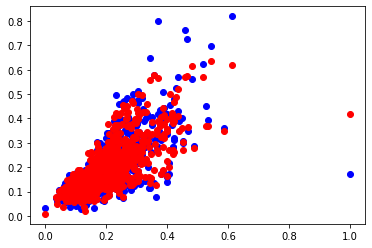

In [327]:
plt.scatter( X_train['GrLivArea'] , y_train , color = 'blue')
plt.scatter( X_train['GrLivArea'] , y_pred_train , color = 'red')
plt.show()

###Scatterplot looks good for actual vs predicted.Predicted value looks close

##Residual Analysis for the Model built through Lasso Approach



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


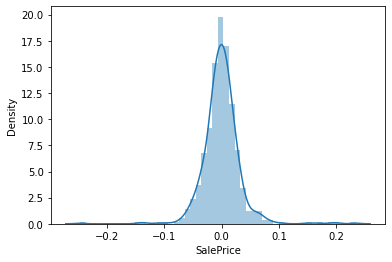

In [328]:
res = y_train - y_pred_train
sns.distplot(res)

In [329]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.482163e-01,0.904921,0.912440
1,R2 Score (Test),-2.559119e+19,0.799586,0.825604
2,RSS (Train),4.683346e-01,0.859902,0.791900
3,RSS (Test),1.482065e+20,1.160661,1.009981
4,MSE (Train),2.444106e-02,0.033118,0.031782
5,MSE (Test),6.641466e+08,0.058774,0.054826


In [330]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }
lr_table

{'Metric': ['R2 Score (Train)',
  'R2 Score (Test)',
  'RSS (Train)',
  'RSS (Test)',
  'MSE (Train)',
  'MSE (Test)'],
 'Linear Regression': [0.948216281351793,
  -2.559119171607764e+19,
  0.4683346217648962,
  1.4820648484717855e+20,
  0.02444106358131407,
  664146616.8790148]}

#Changes in Coefficients after Regularization

In [331]:
betas = pd.DataFrame(index=X.columns)
betas

""
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
CentralAir


In [332]:
betas.rows = X.columns
betas.rows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=268)

In [333]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [334]:
pd.set_option('display.max_rows', None)
betas.head(268)

,Linear,Ridge,Lasso
LotFrontage,9.871065e-03,-0.002779,-0.000000
LotArea,5.144455e-01,0.012036,0.000000
OverallQual,6.564979e-02,0.068471,0.111596
OverallCond,5.175328e-02,0.028171,0.043689
MasVnrArea,6.265288e-02,0.043891,0.067781
BsmtFinSF1,2.022115e+10,0.011315,0.000000
BsmtFinSF2,5.281001e+09,-0.001677,0.000000
BsmtUnfSF,8.369348e+09,0.019727,0.009043
TotalBsmtSF,-2.189072e+10,0.017589,0.000000
CentralAir,1.115650e-02,0.007087,0.006969


#Conclusion
The metrics associated with all the three model looks like below:

Metric	Linear Regression	Ridge Regression	Lasso Regression
0	R2 Score (Train)	9.482163e-01	0.904921	0.912440
1	R2 Score (Test)	-2.559119e+19	0.799586	0.825604
2	RSS (Train)	4.683346e-01	0.859902	0.791900
3	RSS (Test)	1.482065e+20	1.160661	1.009981
4	MSE (Train)	2.444106e-02	0.033118	0.031782
5	MSE (Test)	6.641466e+08	0.058774	0.054826

**Lambda Values:**
Optimum Alpha value for Ridge and Lasso
Alpha value for ridge: 6
Alpha value for lasso: 0.0001

**I will choose Lasso over other models:**
-	Lower RSS values
-	Difference between Test and Train R2 Square is lower
-	Higher R2 Square value for both Train and Test

R2 Square on Train data for Lasso Model is 0.91244
So, 91% of the variation can be explained by the Lasso model

**Top five impactfull predictors:**
GrLivArea
PoolQC_Gd
OverallQual
RoofMatl_WdShngl
MasVnrArea


